In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("/content/creditcard.csv")

In [23]:
print(df.shape)

(72762, 31)


####First 5 lines:

In [24]:
print(df.head(5))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

####Describe:

In [25]:
print(df.describe())

               Time            V1            V2            V3            V4  \
count  72762.000000  72762.000000  72762.000000  72762.000000  72762.000000   
mean   35421.721393     -0.252793     -0.025068      0.679836      0.168592   
std    14625.497013      1.879338      1.662033      1.410956      1.373059   
min        0.000000    -56.407510    -72.715728    -33.680984     -5.172595   
25%    29277.000000     -1.012186     -0.594244      0.192595     -0.724881   
50%    38513.000000     -0.248766      0.072712      0.769142      0.187612   
75%    46509.000000      1.153493      0.727194      1.401675      1.052604   
max    54848.000000      1.960497     18.902453      4.226108     16.715537   

                 V5            V6            V7            V8            V9  \
count  72762.000000  72762.000000  72762.000000  72762.000000  72762.000000   
mean      -0.271527      0.098343     -0.113653      0.056163      0.011852   
std        1.389137      1.305206      1.252884    

####Info:

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72762 entries, 0 to 72761
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    72762 non-null  int64  
 1   V1      72762 non-null  float64
 2   V2      72762 non-null  float64
 3   V3      72762 non-null  float64
 4   V4      72762 non-null  float64
 5   V5      72762 non-null  float64
 6   V6      72762 non-null  float64
 7   V7      72762 non-null  float64
 8   V8      72762 non-null  float64
 9   V9      72762 non-null  float64
 10  V10     72761 non-null  float64
 11  V11     72761 non-null  float64
 12  V12     72761 non-null  float64
 13  V13     72761 non-null  float64
 14  V14     72761 non-null  float64
 15  V15     72761 non-null  float64
 16  V16     72761 non-null  float64
 17  V17     72761 non-null  float64
 18  V18     72761 non-null  float64
 19  V19     72761 non-null  float64
 20  V20     72761 non-null  float64
 21  V21     72761 non-null  float64
 22

In [27]:
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [28]:
df.isnull().values.any()

True

In [29]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [30]:
print("Class as pie chart:")

Class as pie chart:


Class as pie chart:


Text(0, 0.5, '')

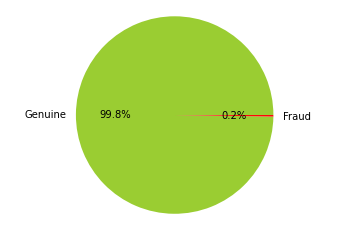

In [31]:
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

Time variable
72757    15.235000
72758    15.235000
72759    15.235278
72760    15.235278
72761    15.235556
Name: Time_Hr, dtype: float64


Text(0, 0.5, '# transactions')

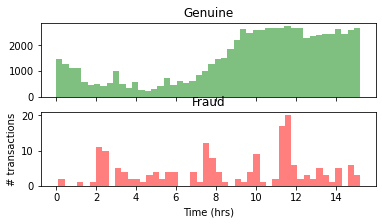

In [32]:
print("Time variable")
df["Time_Hr"] = df["Time"]/3600 # convert to hours
print(df["Time_Hr"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(df.Time_Hr[df.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(df.Time_Hr[df.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

Text(0, 0.5, '# transactions')

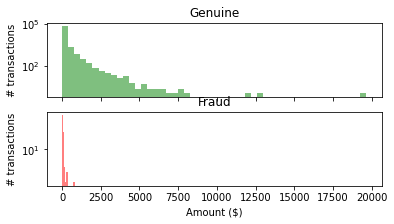

In [33]:
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(df.Amount[df.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(df.Amount[df.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

In [34]:
from sklearn.preprocessing import StandardScaler
df['scaled_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'],axis=1)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

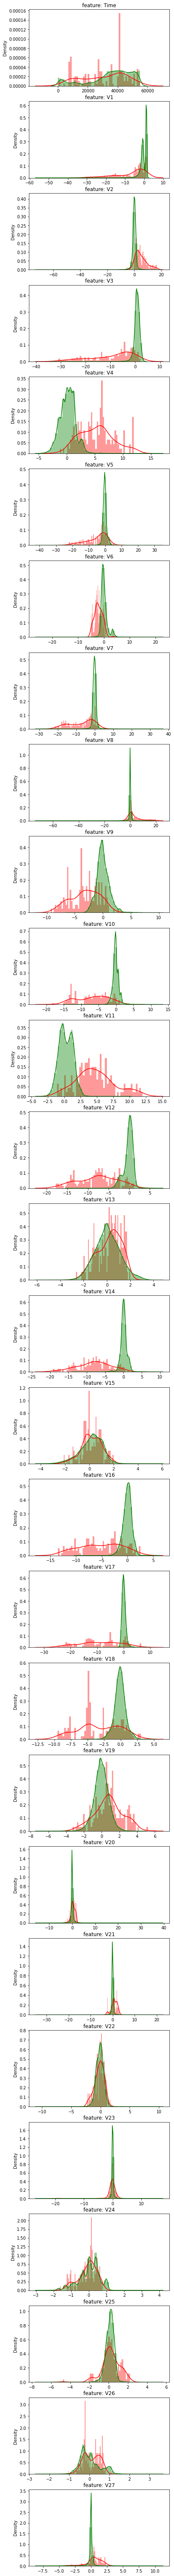

In [35]:
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(df[df.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.Class == 1], bins=50, color='r')
    sns.distplot(df[col][df.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()